## LOAD DATASETS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load all datasets
df_iowait = pd.read_csv("cpu_iowait.csv")
df_cpu_irq = pd.read_csv("cpu_irq.csv")
df_system_msec = pd.read_csv("cpu_system_msec.csv")
df_user_msec = pd.read_csv("cpu_user_msec.csv")
df_cpu_util = pd.read_csv("cpu_util_per.csv")

df_baseline_iowait = pd.read_csv("../../baseline/cpu related/cpu_iowait.csv")
df_baseline_irq = pd.read_csv("../../baseline/cpu related/cpu_irq.csv")
df_baseline_system_msec = pd.read_csv("../../baseline/cpu related/cpu_system_msec.csv")
df_baseline_user_msec = pd.read_csv("../../baseline/cpu related/cpu_user_msec.csv")
df_baseline_util_per = pd.read_csv("../../baseline/cpu related/cpu_util_per.csv")

# Add source labels
df_iowait["source"] = "CPU STRESS"
df_cpu_irq["source"] = "CPU STRESS"
df_system_msec["source"] = "CPU STRESS"
df_user_msec["source"] = "CPU STRESS"
df_cpu_util["source"] = "CPU STRESS"

df_baseline_iowait["source"] = "BASELINE"
df_baseline_irq["source"] = "BASELINE"
df_baseline_system_msec["source"] = "BASELINE"
df_baseline_user_msec["source"] = "BASELINE"
df_baseline_util_per["source"] = "BASELINE"

# Convert to datetime
df_iowait["Time"] = pd.to_datetime(df_iowait["Time"])
df_cpu_irq["Time"] = pd.to_datetime(df_cpu_irq["Time"])
df_system_msec["Time"] = pd.to_datetime(df_system_msec["Time"])
df_user_msec["Time"] = pd.to_datetime(df_user_msec["Time"])
df_cpu_util["Time"] = pd.to_datetime(df_cpu_util["Time"])

df_baseline_iowait["Time"] = pd.to_datetime(df_baseline_iowait["Time"])
df_baseline_irq["Time"] = pd.to_datetime(df_baseline_irq["Time"])
df_baseline_system_msec["Time"] = pd.to_datetime(df_baseline_system_msec["Time"]) 
df_baseline_user_msec["Time"] = pd.to_datetime(df_baseline_user_msec["Time"])
df_baseline_util_per["Time"] = pd.to_datetime(df_baseline_util_per["Time"])

delay = 30
duration = 50

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_iowait["Time"].min() - df_iowait["Time"].min()
df_iowait["Time"] += time_offset
df_cpu_irq["Time"] += time_offset
df_system_msec["Time"] += time_offset
df_user_msec["Time"] += time_offset
df_cpu_util["Time"] += time_offset

# Convert timeline to minutes 
all_dfs = [
    df_iowait, df_cpu_irq, df_system_msec, df_user_msec, df_cpu_util,
    df_baseline_iowait, df_baseline_irq, df_baseline_system_msec, 
    df_baseline_user_msec, df_baseline_util_per
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# ORIGINAL DATASETS DICTIONARY 
original_datasets = {
    'IOWait': {'cpu_stress': df_iowait, 'baseline': df_baseline_iowait},
    'IRQ': {'cpu_stress': df_cpu_irq, 'baseline': df_baseline_irq},
    'System': {'cpu_stress': df_system_msec, 'baseline': df_baseline_system_msec},
    'User': {'cpu_stress': df_user_msec, 'baseline': df_baseline_user_msec},
    'Utilization': {'cpu_stress': df_cpu_util, 'baseline': df_baseline_util_per}
}

## PLOTTING


📊 Processing IOWait with outlier detection:
  🔍 CPU STRESS:
    ✅ Removed 23 anomalous data points (5% contamination threshold)
  🔍 BASELINE:
    ✅ Removed 24 anomalous data points (5% contamination threshold)

📊 Processing IRQ with outlier detection:
  🔍 CPU STRESS:
    ✅ Removed 24 anomalous data points (5% contamination threshold)
  🔍 BASELINE:
    ✅ Removed 22 anomalous data points (5% contamination threshold)

📊 Processing System with outlier detection:
  🔍 CPU STRESS:
    ✅ Removed 24 anomalous data points (5% contamination threshold)
  🔍 BASELINE:
    ✅ Removed 24 anomalous data points (5% contamination threshold)

📊 Processing User with outlier detection:
  🔍 CPU STRESS:
    ✅ Removed 23 anomalous data points (5% contamination threshold)
  🔍 BASELINE:
    ✅ Removed 25 anomalous data points (5% contamination threshold)

📊 Processing Utilization with outlier detection:
  🔍 CPU STRESS:
    ✅ Removed 23 anomalous data points (5% contamination threshold)
  🔍 BASELINE:
    ✅ Removed

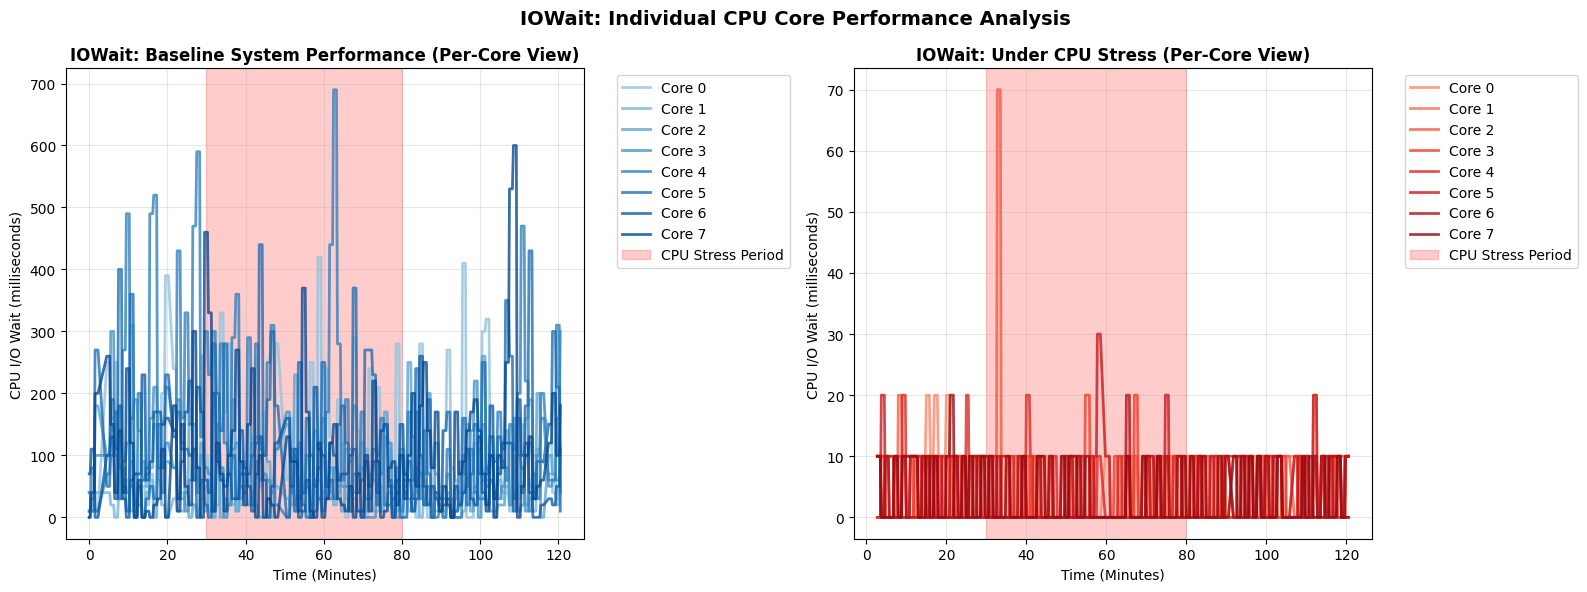

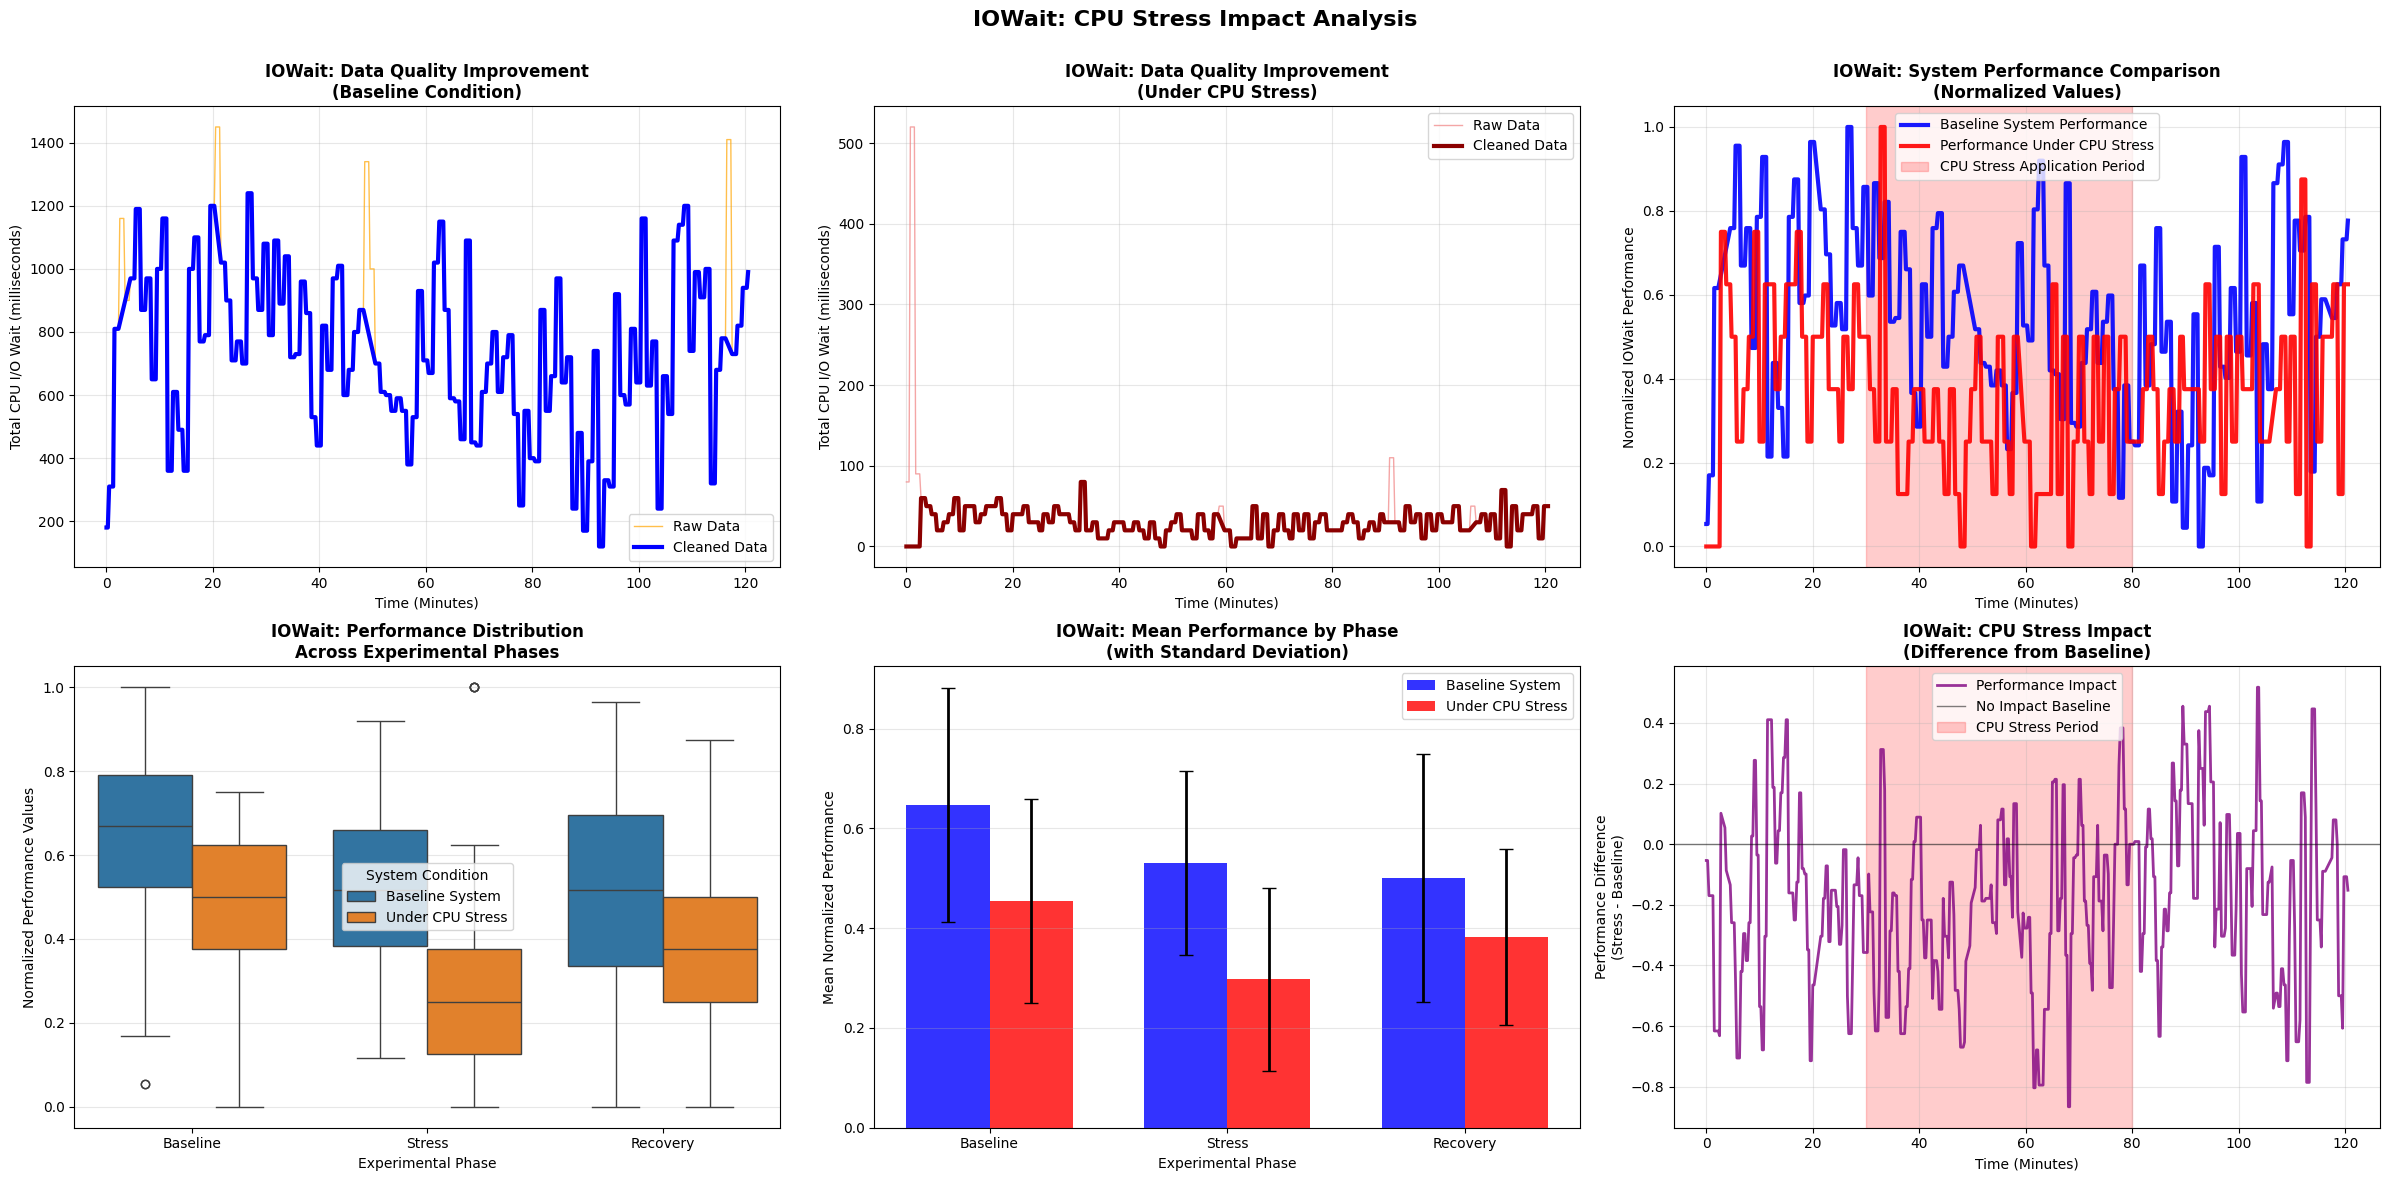

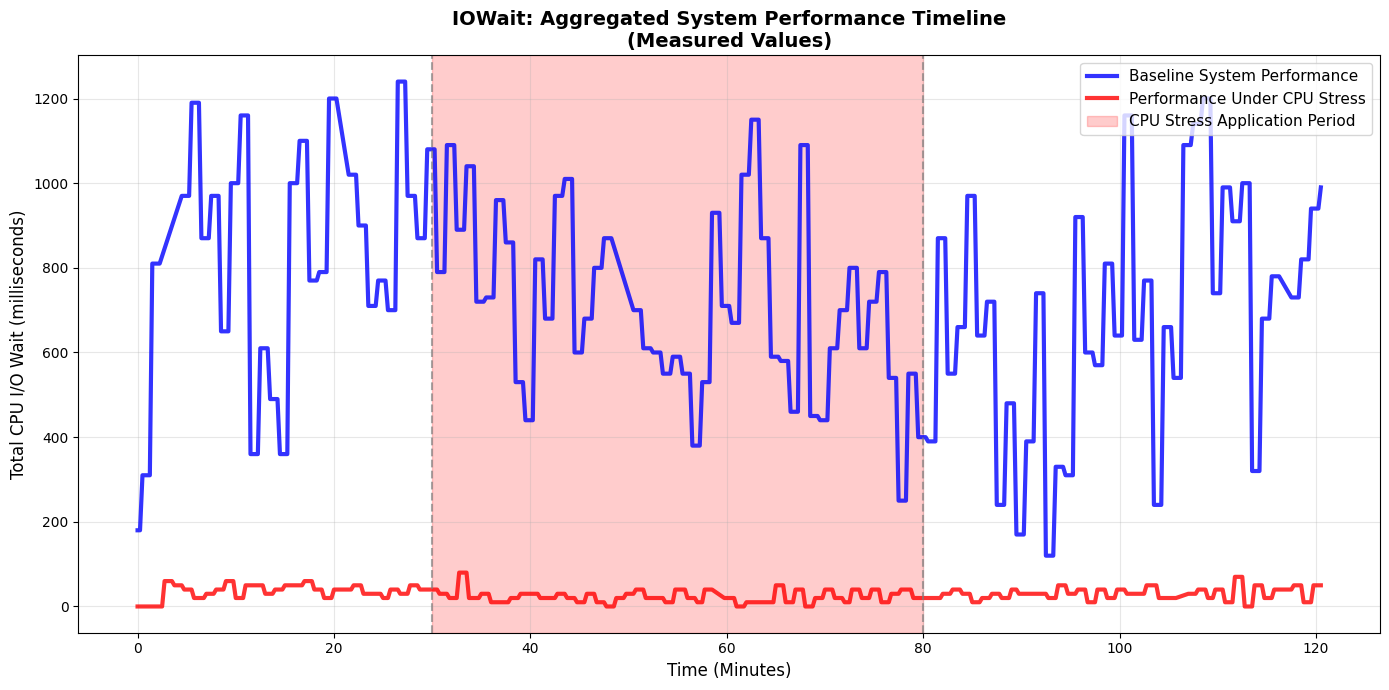


📈 OVERALL PERFORMANCE SUMMARY:
  Baseline Mean Performance: 735.42
  Under Stress Mean Performance: 29.17
  Absolute Performance Change: -706.25
  Relative Performance Change: -96.0%

IOWAIT - PERFORMANCE IMPACT ANALYSIS

📊 BASELINE SYSTEM PERFORMANCE BY EXPERIMENTAL PHASE:
            mean     std     min     max
phase                                   
Baseline  0.6461  0.2346  0.0536  1.0000
Recovery  0.5005  0.2483  0.0000  0.9643
Stress    0.5313  0.1842  0.1161  0.9196

📊 PERFORMANCE UNDER CPU STRESS BY EXPERIMENTAL PHASE:
            mean     std  min    max
phase                               
Baseline  0.4542  0.2049  0.0  0.750
Recovery  0.3819  0.1767  0.0  0.875
Stress    0.2973  0.1833  0.0  1.000

🔬 STATISTICAL SIGNIFICANCE ANALYSIS:
  Baseline: t-statistic=  6.75, p-value=  0.0000 (✅ STATISTICALLY SIGNIFICANT)
  Stress  : t-statistic= 12.77, p-value=  0.0000 (✅ STATISTICALLY SIGNIFICANT)
  Recovery: t-statistic=  4.95, p-value=  0.0000 (✅ STATISTICALLY SIGNIFICANT)

📈 C

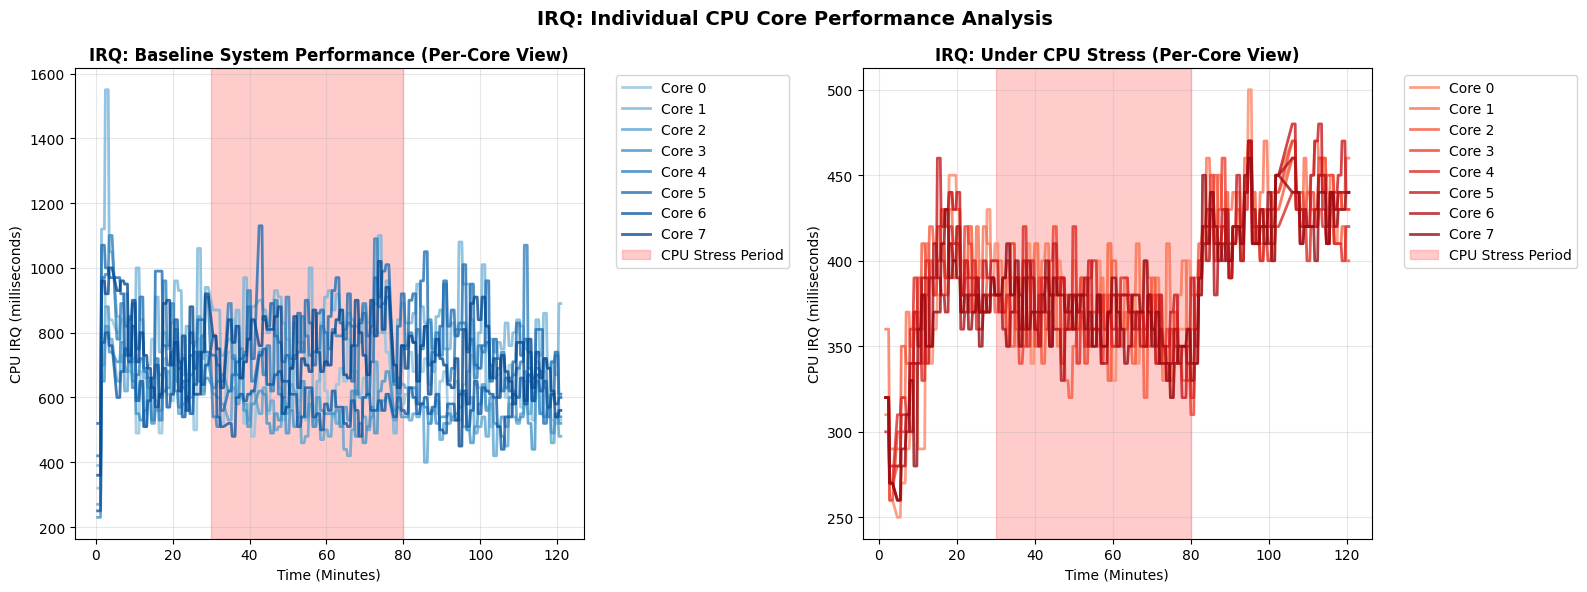

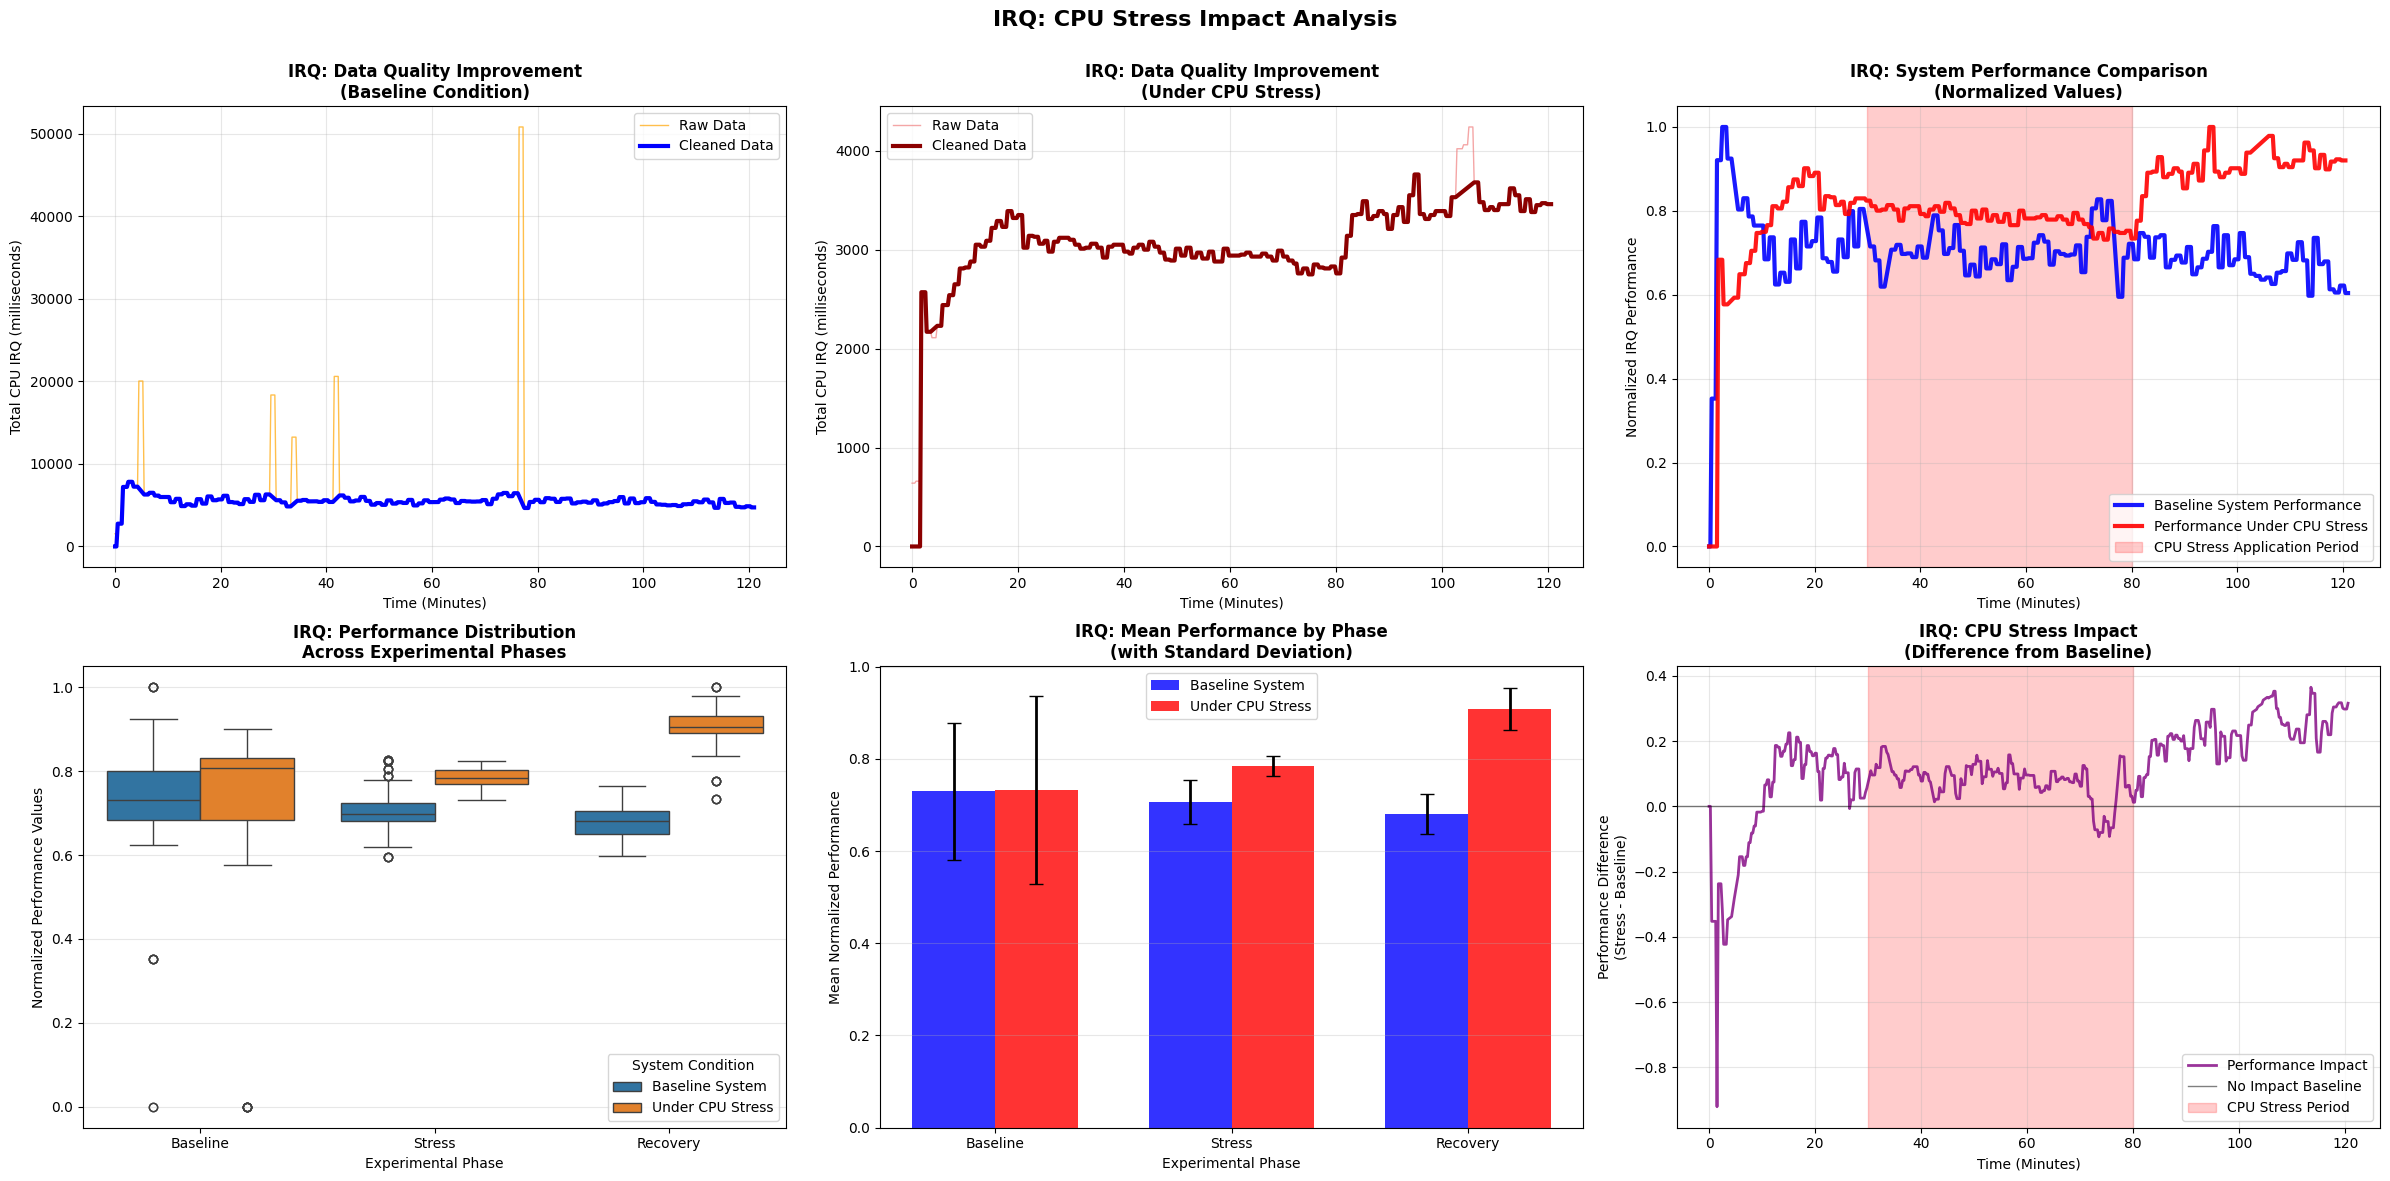

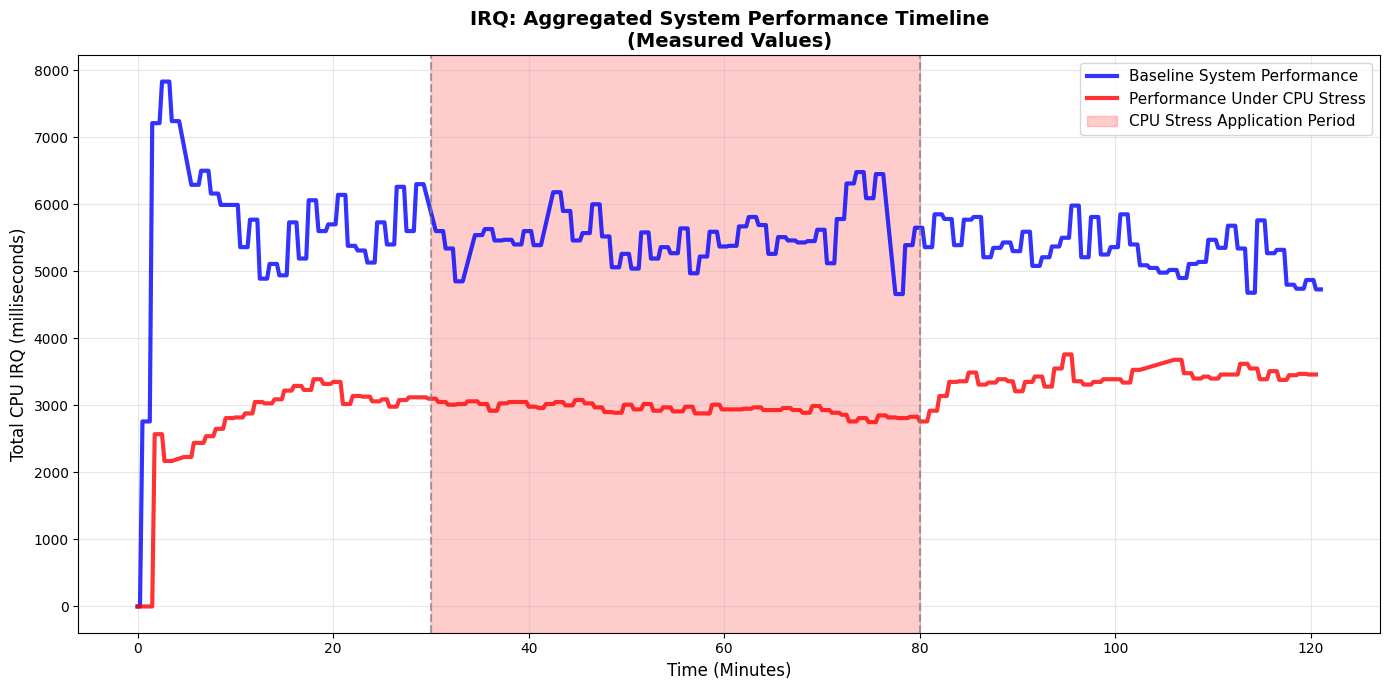


📈 OVERALL PERFORMANCE SUMMARY:
  Baseline Mean Performance: 5504.89
  Under Stress Mean Performance: 3055.00
  Absolute Performance Change: -2449.89
  Relative Performance Change: -44.5%

IRQ - PERFORMANCE IMPACT ANALYSIS

📊 BASELINE SYSTEM PERFORMANCE BY EXPERIMENTAL PHASE:
            mean     std     min     max
phase                                   
Baseline  0.7296  0.1487  0.0000  1.0000
Recovery  0.6803  0.0427  0.5977  0.7637
Stress    0.7058  0.0475  0.5951  0.8276

📊 PERFORMANCE UNDER CPU STRESS BY EXPERIMENTAL PHASE:
            mean     std     min     max
phase                                   
Baseline  0.7326  0.2041  0.0000  0.9016
Recovery  0.9071  0.0458  0.7340  1.0000
Stress    0.7840  0.0220  0.7314  0.8245

🔬 STATISTICAL SIGNIFICANCE ANALYSIS:
  Baseline: t-statistic= -0.13, p-value=  0.8976 (❌ NOT STATISTICALLY SIGNIFICANT)
  Stress  : t-statistic=-21.16, p-value=  0.0000 (✅ STATISTICALLY SIGNIFICANT)
  Recovery: t-statistic=-46.24, p-value=  0.0000 (✅ STATIS

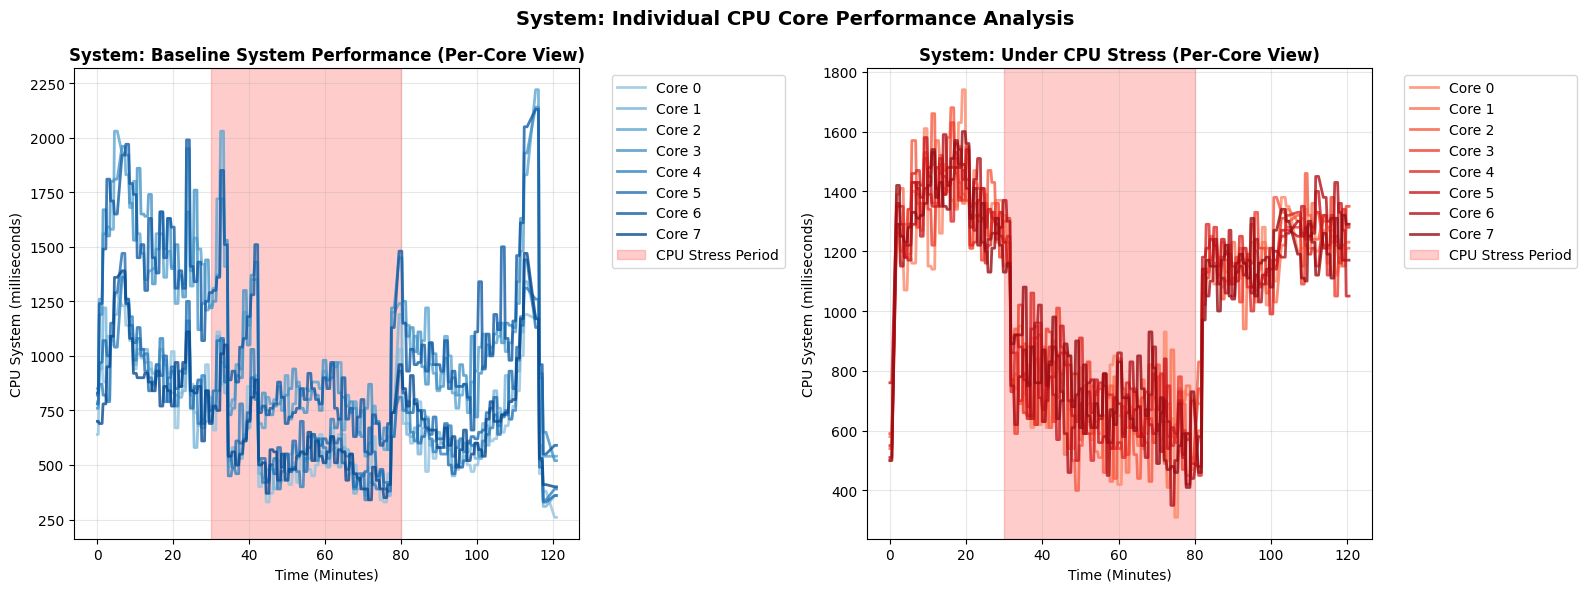

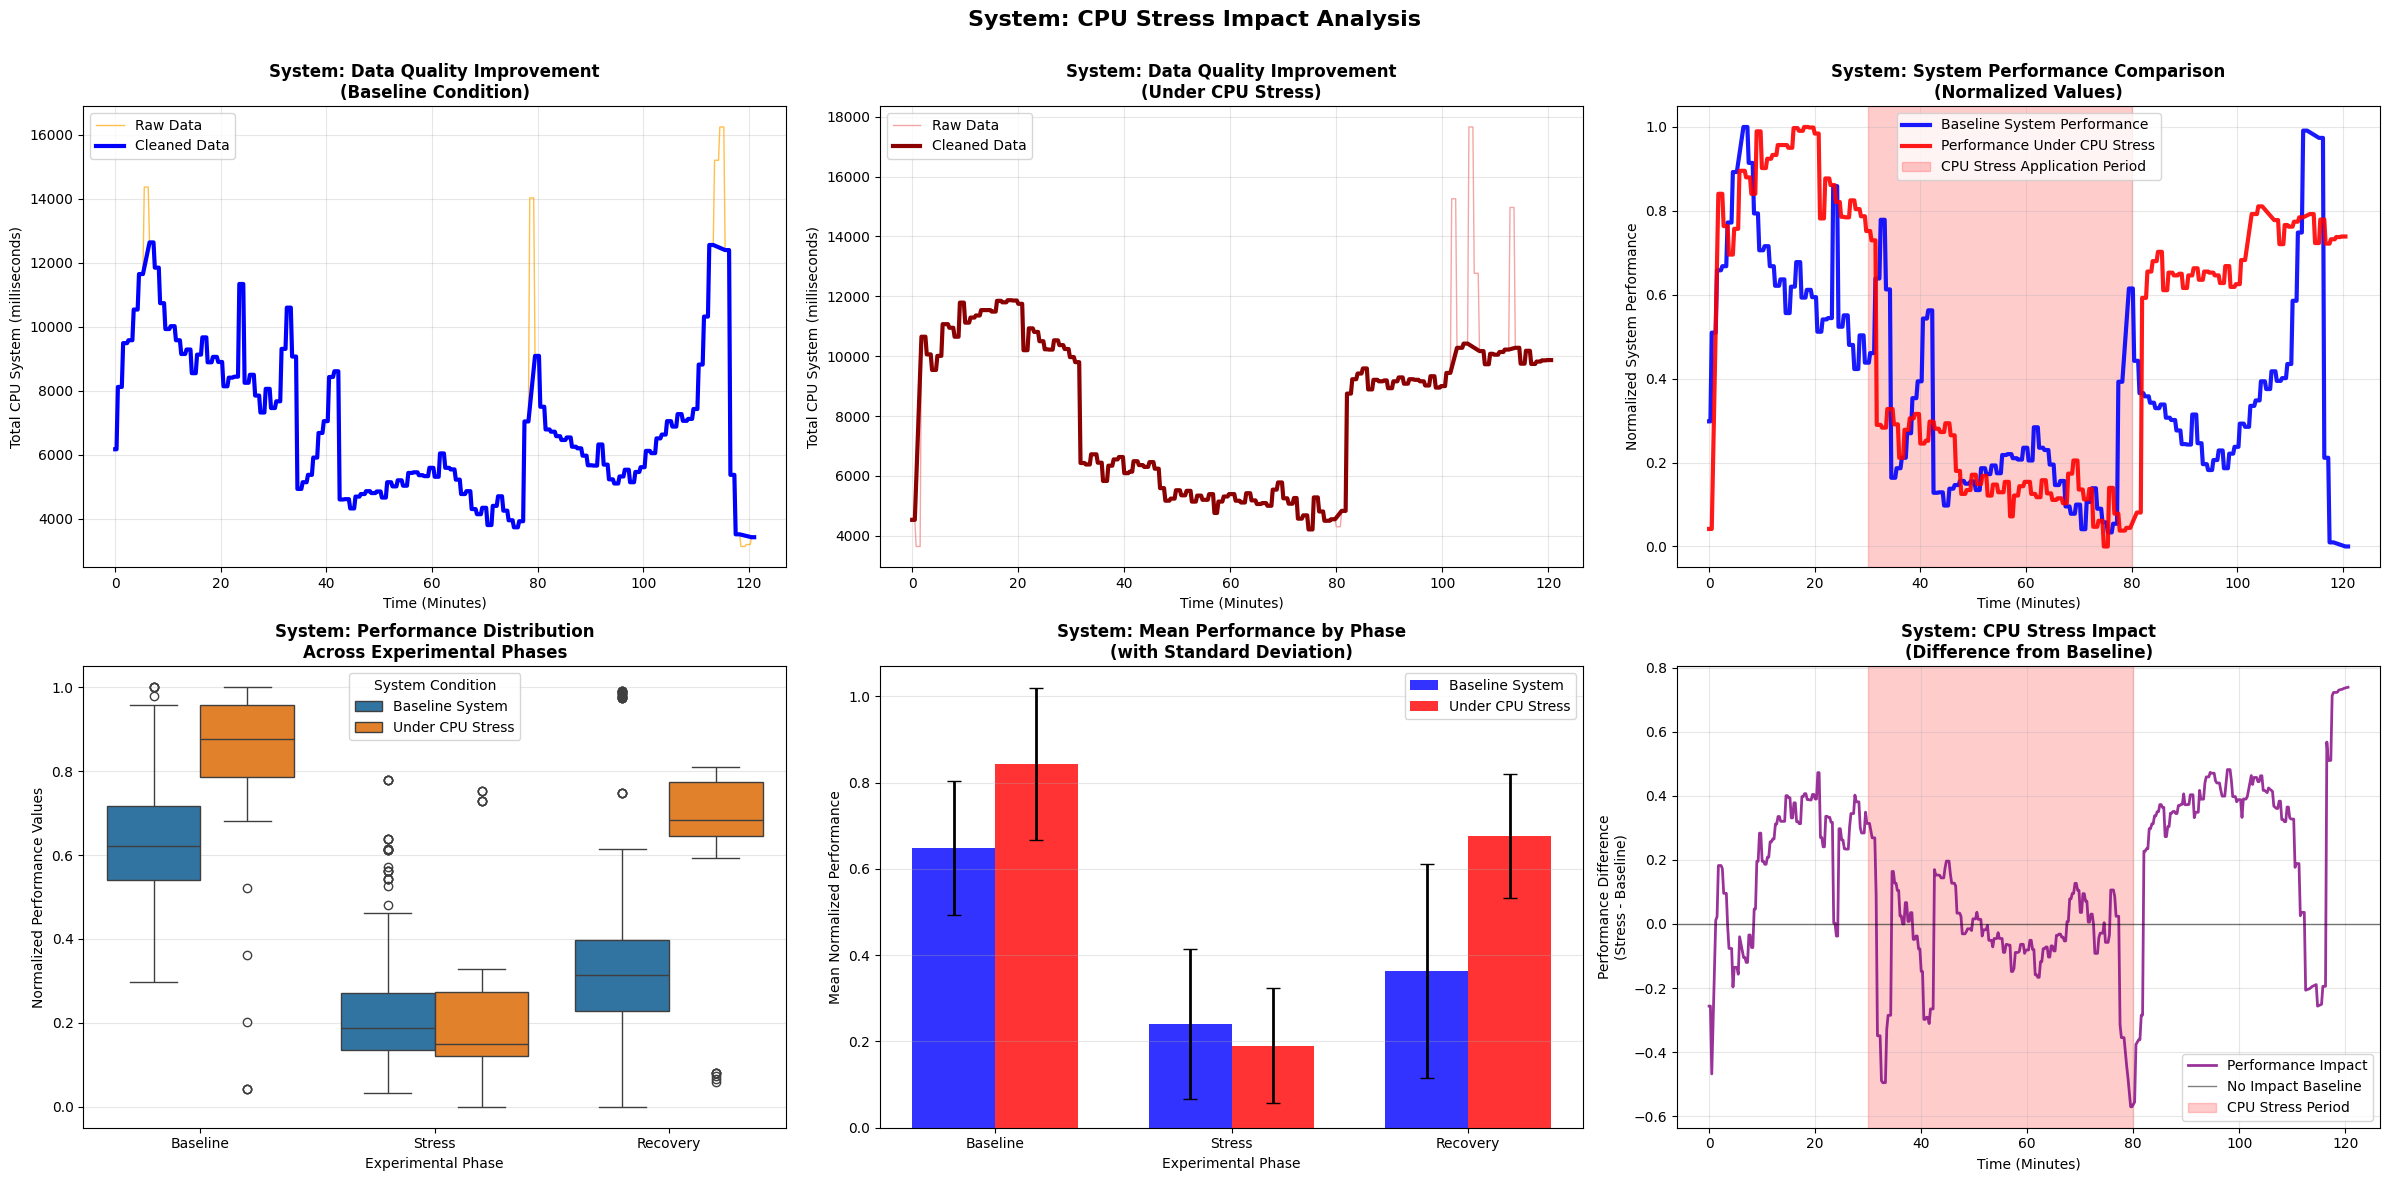

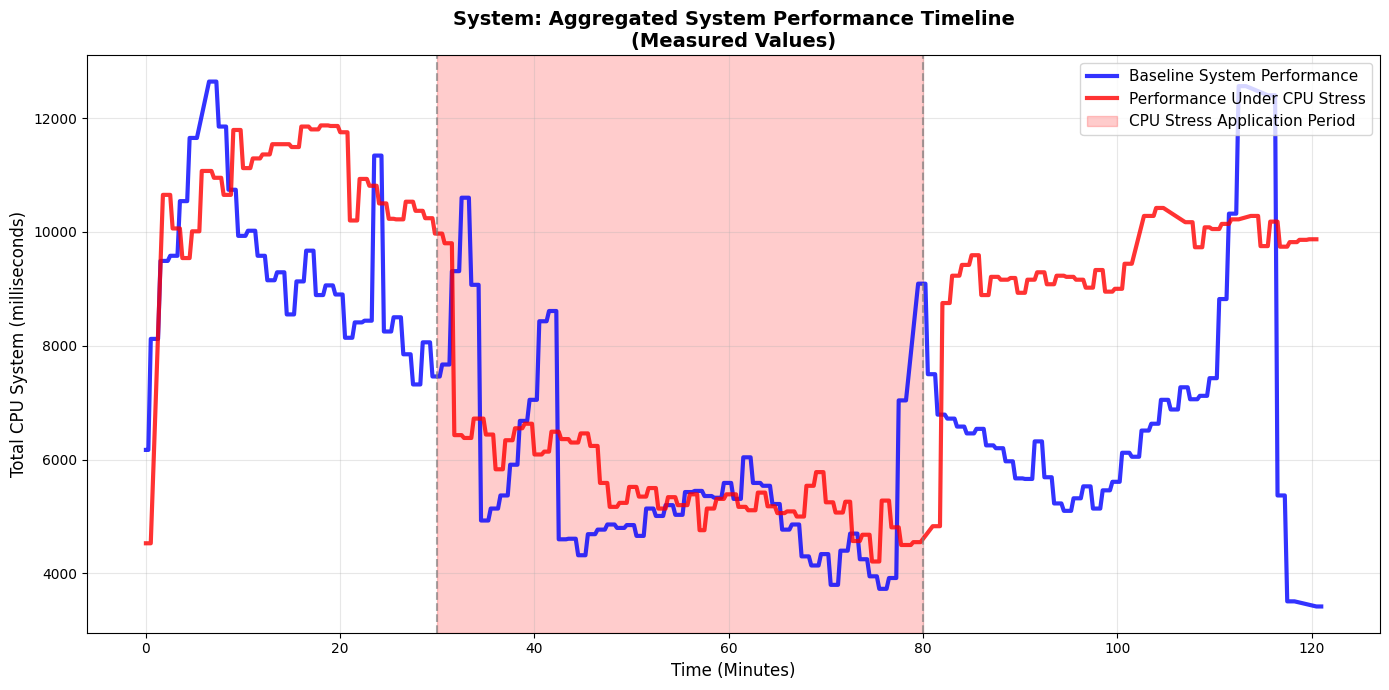


📈 OVERALL PERFORMANCE SUMMARY:
  Baseline Mean Performance: 6949.28
  Under Stress Mean Performance: 8160.43
  Absolute Performance Change: +1211.16
  Relative Performance Change: +17.4%

SYSTEM - PERFORMANCE IMPACT ANALYSIS

📊 BASELINE SYSTEM PERFORMANCE BY EXPERIMENTAL PHASE:
            mean     std     min     max
phase                                   
Baseline  0.6488  0.1556  0.2983  1.0000
Recovery  0.3633  0.2484  0.0000  0.9913
Stress    0.2399  0.1734  0.0336  0.7787

📊 PERFORMANCE UNDER CPU STRESS BY EXPERIMENTAL PHASE:
            mean     std     min     max
phase                                   
Baseline  0.8425  0.1764  0.0418  1.0000
Recovery  0.6774  0.1437  0.0590  0.8107
Stress    0.1903  0.1339  0.0000  0.7520

🔬 STATISTICAL SIGNIFICANCE ANALYSIS:
  Baseline: t-statistic= -9.03, p-value=  0.0000 (✅ STATISTICALLY SIGNIFICANT)
  Stress  : t-statistic=  3.20, p-value=  0.0015 (✅ STATISTICALLY SIGNIFICANT)
  Recovery: t-statistic=-13.95, p-value=  0.0000 (✅ STATIST

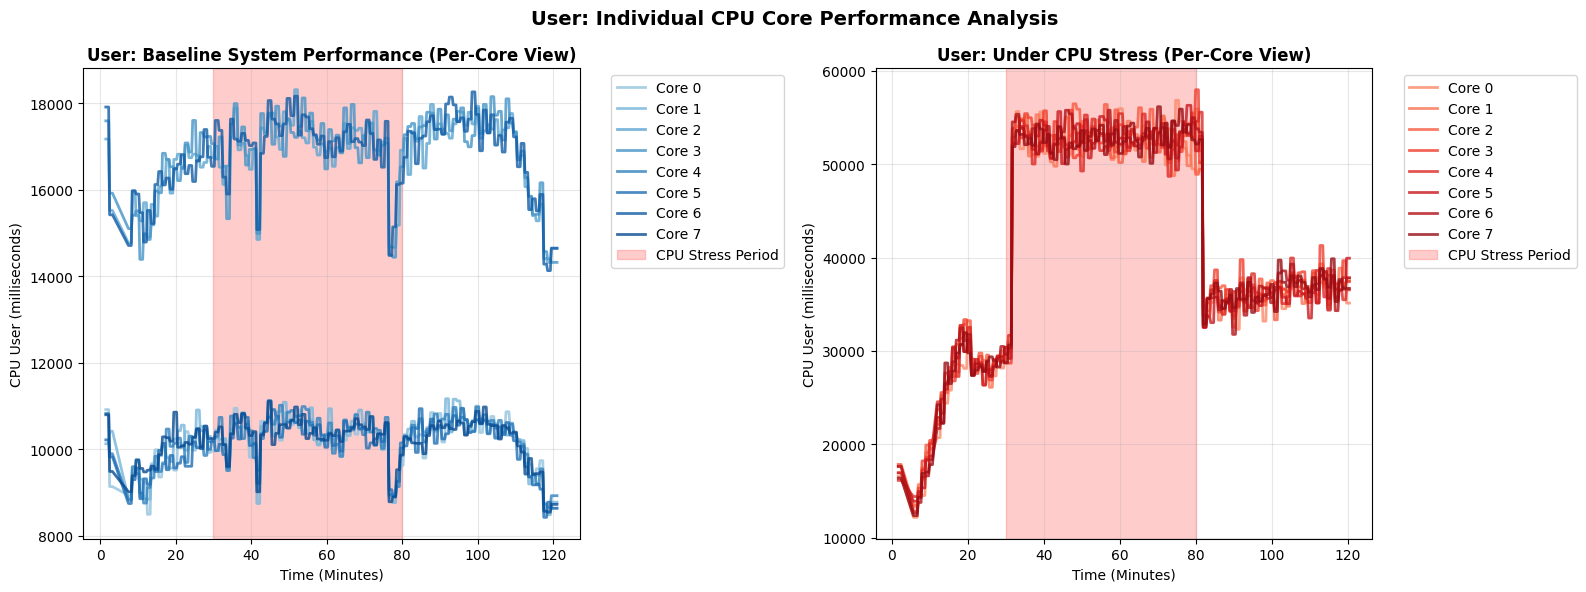

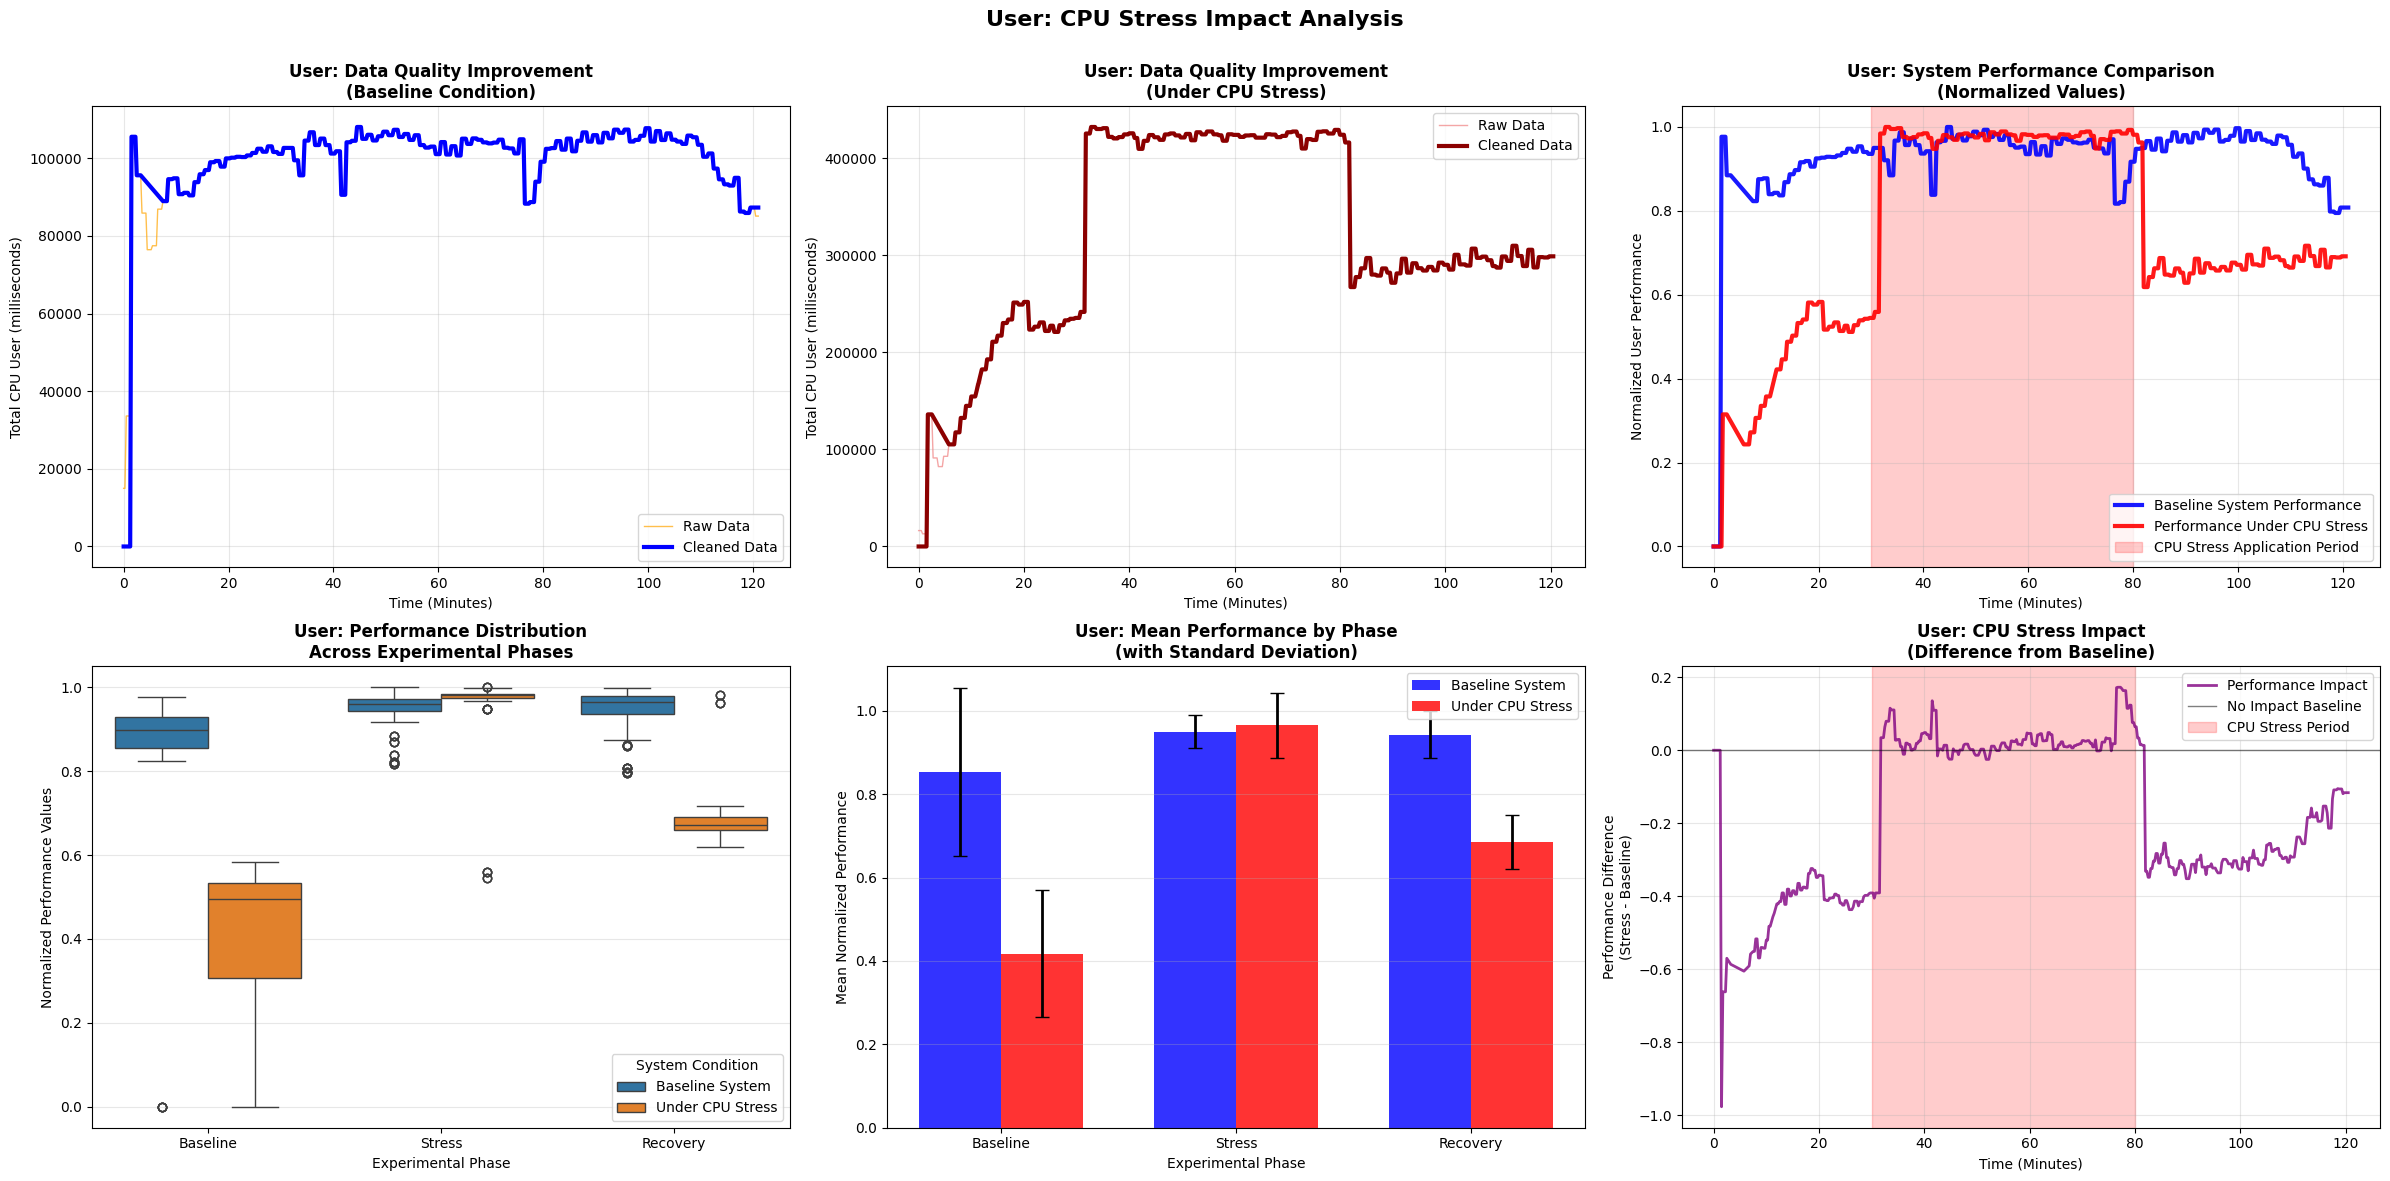

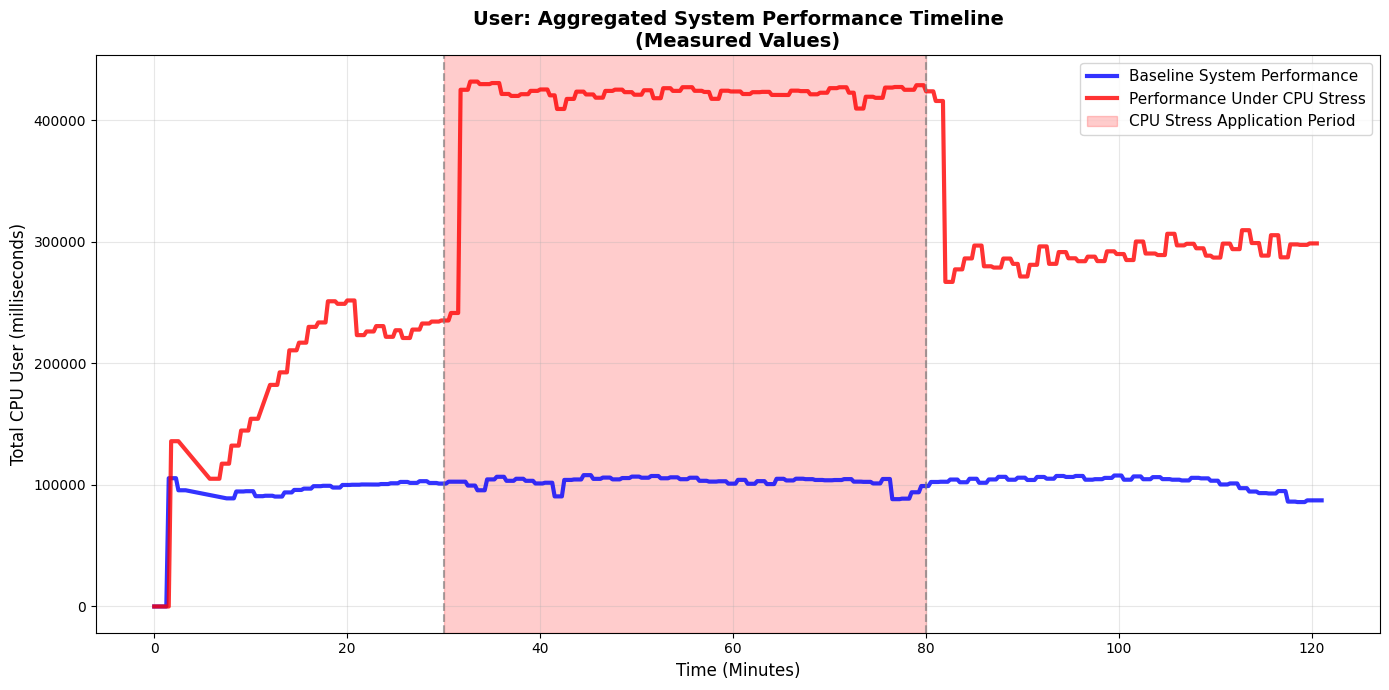


📈 OVERALL PERFORMANCE SUMMARY:
  Baseline Mean Performance: 99818.37
  Under Stress Mean Performance: 317514.18
  Absolute Performance Change: +217695.81
  Relative Performance Change: +218.1%

USER - PERFORMANCE IMPACT ANALYSIS

📊 BASELINE SYSTEM PERFORMANCE BY EXPERIMENTAL PHASE:
            mean     std     min     max
phase                                   
Baseline  0.8533  0.2008  0.0000  0.9767
Recovery  0.9421  0.0564  0.7950  0.9971
Stress    0.9502  0.0397  0.8171  1.0000

📊 PERFORMANCE UNDER CPU STRESS BY EXPERIMENTAL PHASE:
            mean     std     min     max
phase                                   
Baseline  0.4177  0.1519  0.0000  0.5830
Recovery  0.6849  0.0644  0.6184  0.9814
Stress    0.9648  0.0790  0.5449  1.0000

🔬 STATISTICAL SIGNIFICANCE ANALYSIS:
  Baseline: t-statistic= 18.95, p-value=  0.0000 (✅ STATISTICALLY SIGNIFICANT)
  Stress  : t-statistic= -2.35, p-value=  0.0195 (✅ STATISTICALLY SIGNIFICANT)
  Recovery: t-statistic= 38.38, p-value=  0.0000 (✅ STA

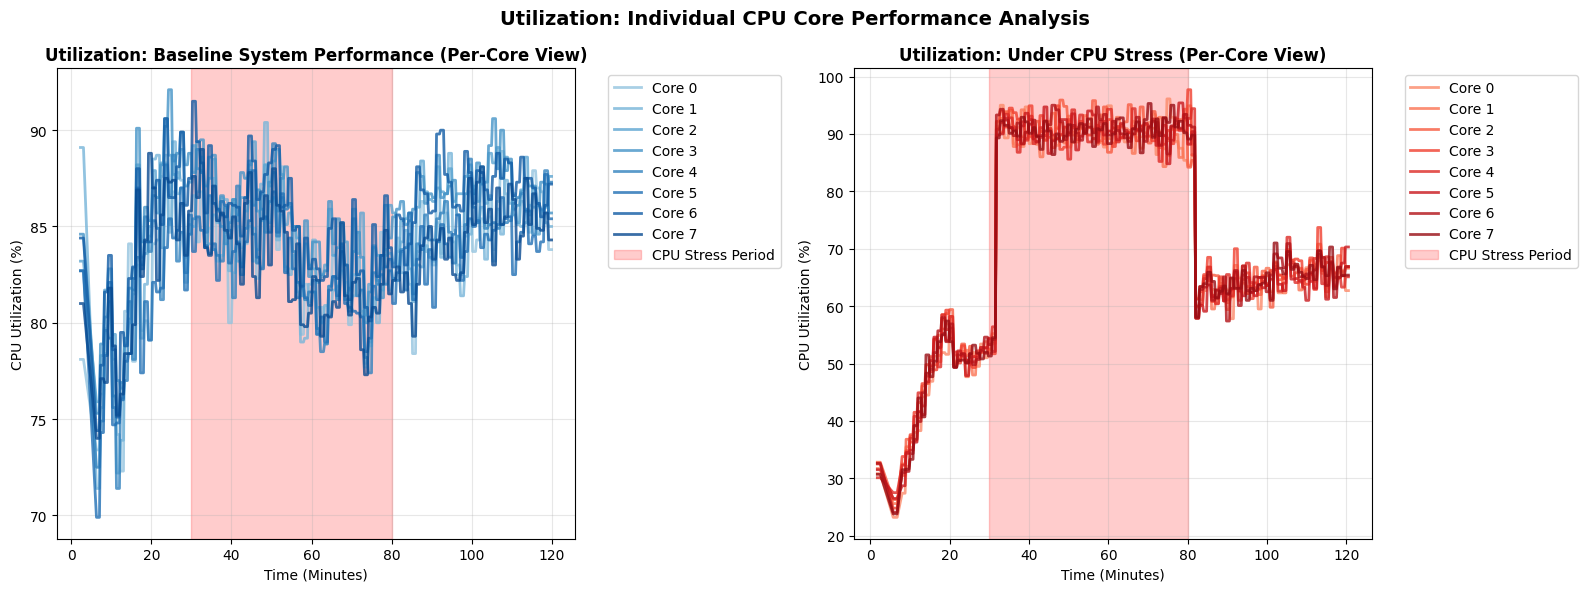

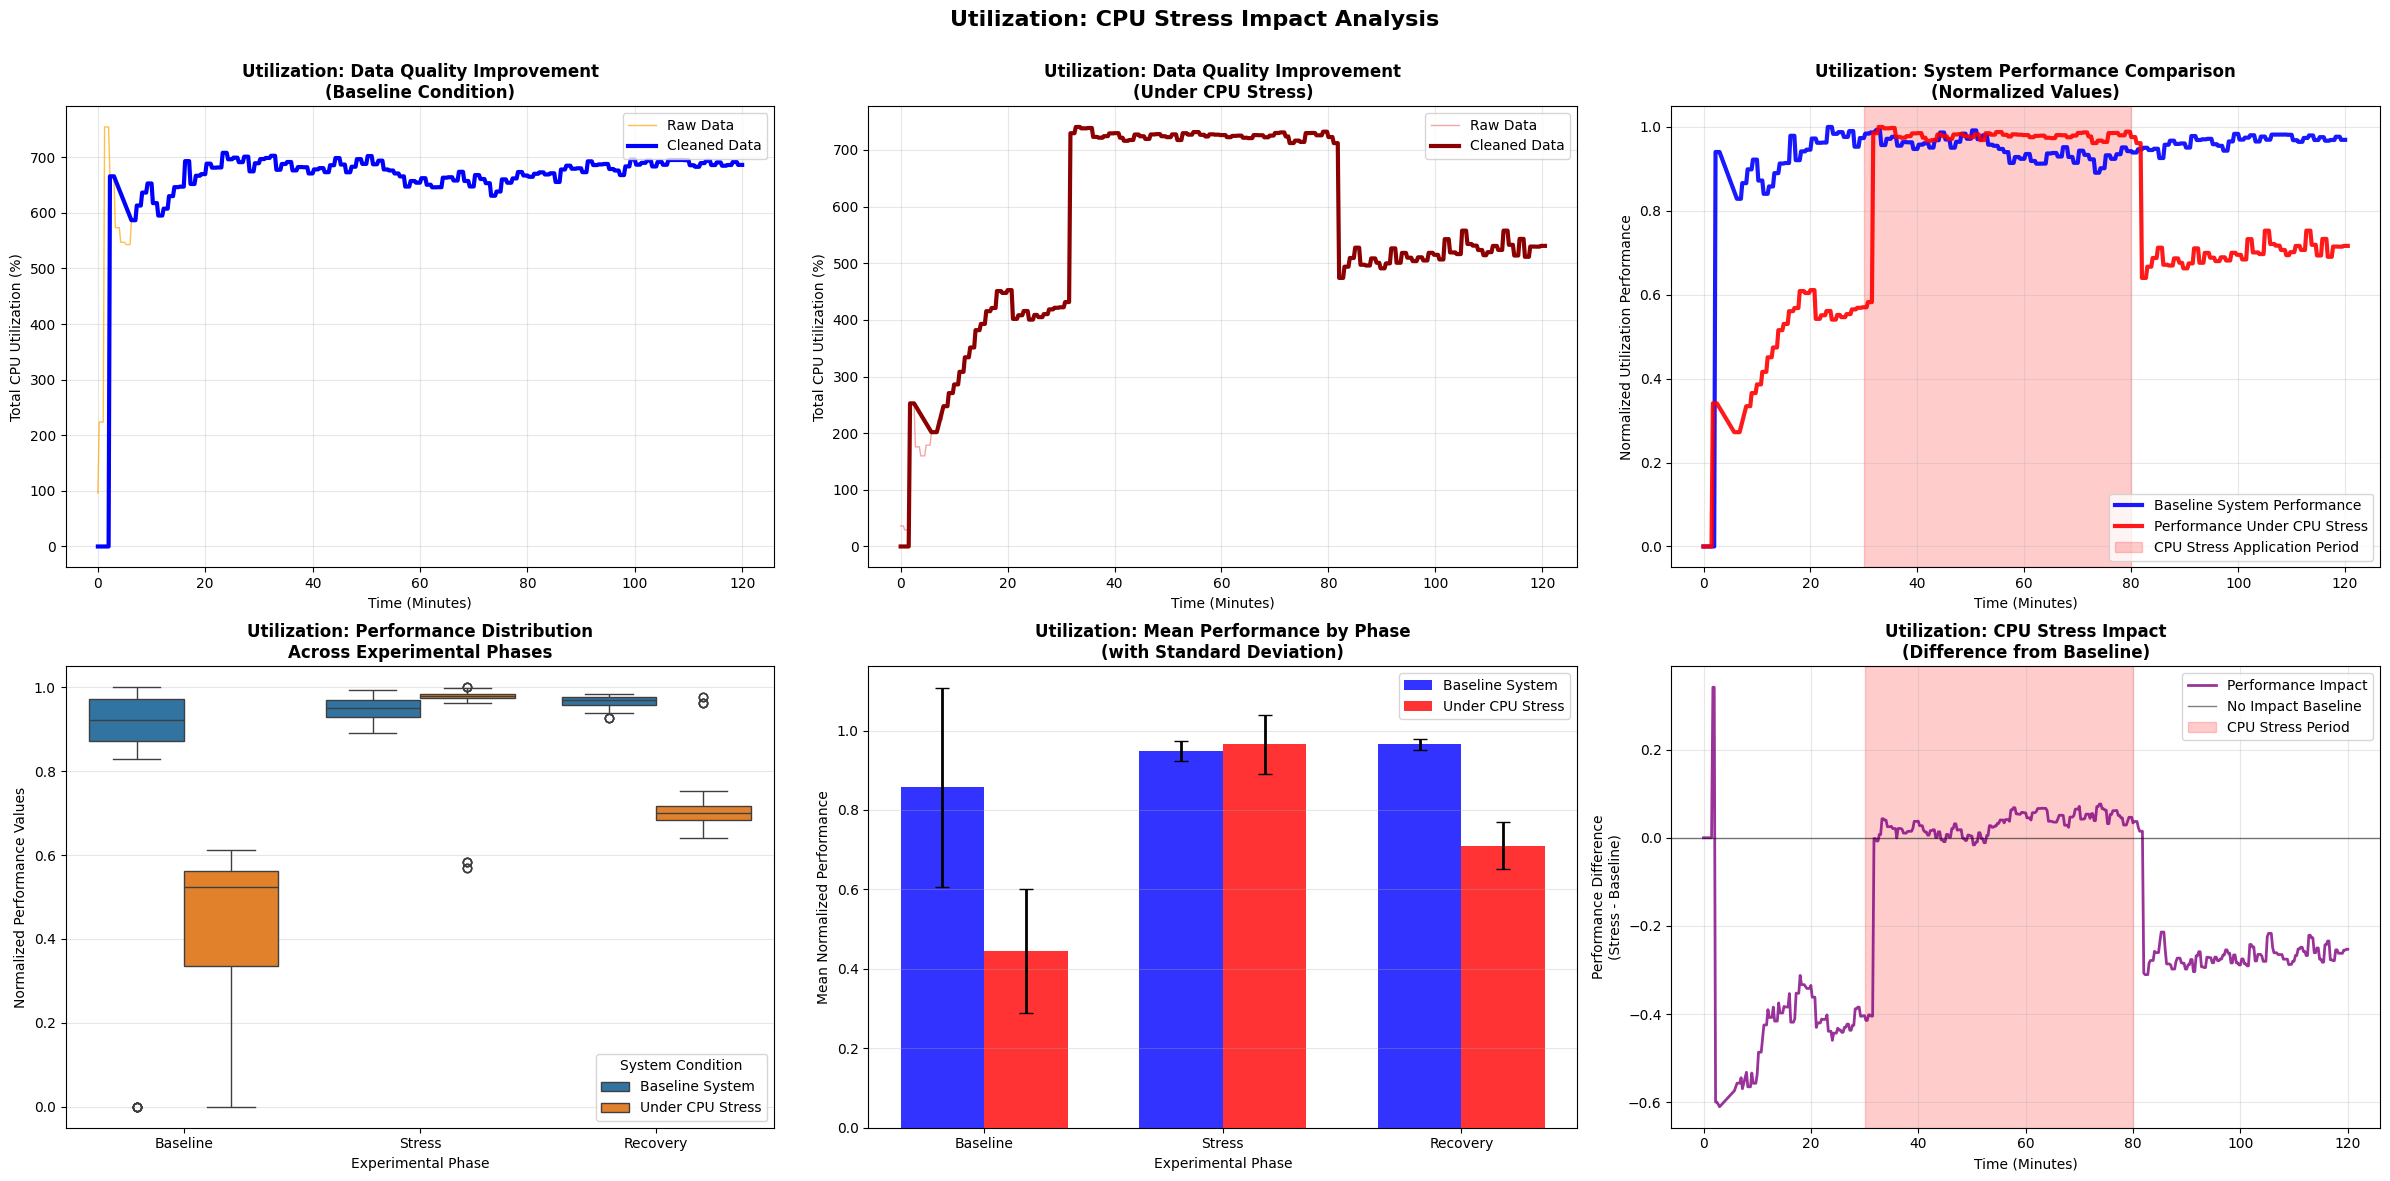

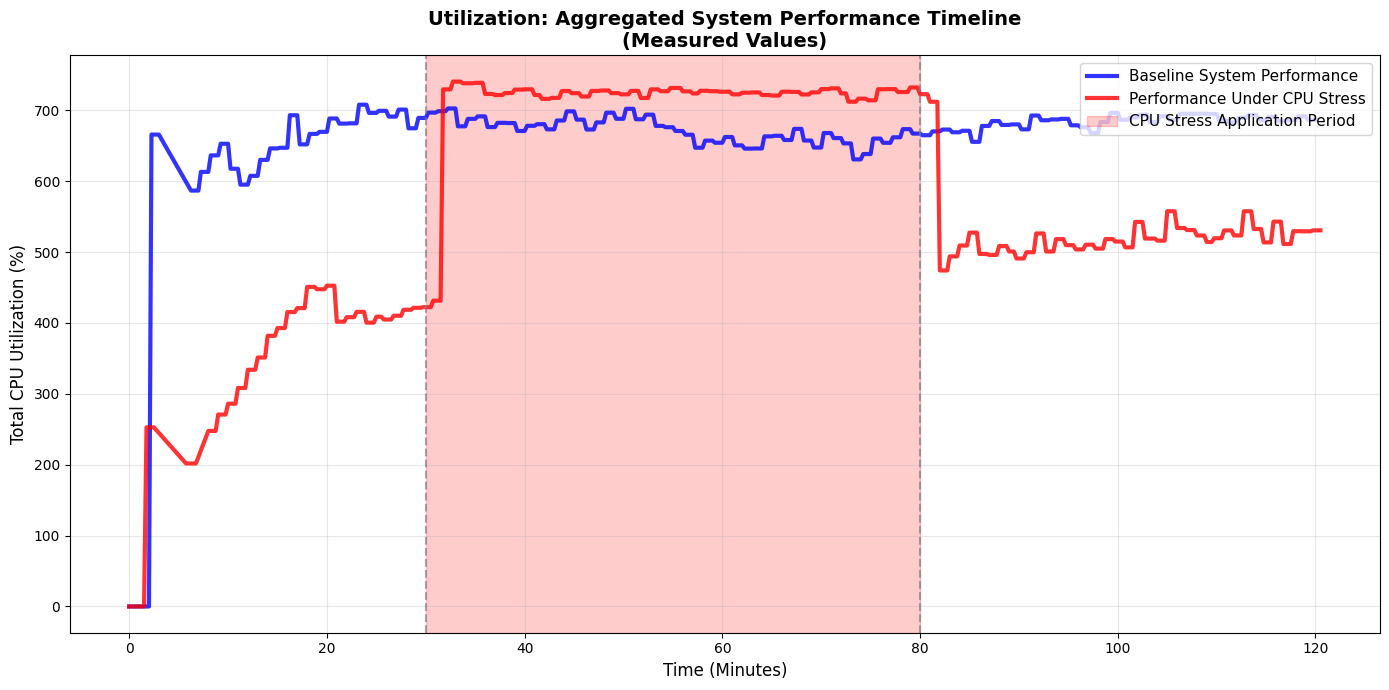


📈 OVERALL PERFORMANCE SUMMARY:
  Baseline Mean Performance: 659.46
  Under Stress Mean Performance: 555.82
  Absolute Performance Change: -103.64
  Relative Performance Change: -15.7%

UTILIZATION - PERFORMANCE IMPACT ANALYSIS

📊 BASELINE SYSTEM PERFORMANCE BY EXPERIMENTAL PHASE:
            mean     std    min     max
phase                                  
Baseline  0.8568  0.2496  0.000  1.0000
Recovery  0.9656  0.0134  0.926  0.9836
Stress    0.9488  0.0247  0.891  0.9925

📊 PERFORMANCE UNDER CPU STRESS BY EXPERIMENTAL PHASE:
            mean     std     min     max
phase                                   
Baseline  0.4440  0.1562  0.0000  0.6111
Recovery  0.7102  0.0595  0.6402  0.9760
Stress    0.9659  0.0744  0.5702  1.0000

🔬 STATISTICAL SIGNIFICANCE ANALYSIS:
  Baseline: t-statistic= 15.36, p-value=  0.0000 (✅ STATISTICALLY SIGNIFICANT)
  Stress  : t-statistic= -3.10, p-value=  0.0021 (✅ STATISTICALLY SIGNIFICANT)
  Recovery: t-statistic= 52.65, p-value=  0.0000 (✅ STATISTICA

In [ ]:
# ISOLATION FOREST OUTLIER DETECTION
def remove_outliers_isolation_forest(df, contamination=0.02):
    df_clean = df.copy()
    cpu_cols = [col for col in df.columns if col.startswith('cpu')]
    outlier_stats = {}
    
    if len(cpu_cols) == 0:
        return df_clean, outlier_stats
    
    feature_matrix = df[cpu_cols].values
    
    # missing values ffill
    if np.isnan(feature_matrix).any():
        feature_matrix = pd.DataFrame(feature_matrix).fillna(method='ffill').fillna(method='bfill').values
    
    # Scale features for better performance
    scaler = StandardScaler()
    feature_matrix_scaled = scaler.fit_transform(feature_matrix)
    
    # Initialize and fit Isolation Forest
    iso_forest = IsolationForest(
        contamination=contamination,
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
    
    iso_forest.fit(feature_matrix_scaled)
    outlier_predictions = iso_forest.predict(feature_matrix_scaled)
    
    outlier_mask = outlier_predictions == -1
    
    # removal
    for col in cpu_cols:
        outlier_stats[col] = {
            'count': outlier_mask.sum(),
            'percentage': (outlier_mask.sum() / len(df[col])) * 100
        }
        
        # Set outliers to NaN and interpolate
        df_clean.loc[outlier_mask, col] = np.nan
        df_clean[col] = df_clean[col].interpolate(method='linear')

    outlier_stats['_summary'] = {
        'total_outliers': outlier_mask.sum(),
        'contamination_rate': contamination,
        'method': 'isolation_forest'
    }
    
    return df_clean, outlier_stats

# APPLY OUTLIER CLEANING
datasets_clean = {}
all_outlier_stats = {}

for dataset_name, dataset_pair in original_datasets.items():
    print(f"\n📊 Processing {dataset_name} with outlier detection:")
    
    datasets_clean[dataset_name] = {}
    all_outlier_stats[dataset_name] = {}
    
    for source_type, df in dataset_pair.items():
        print(f"  🔍 {source_type.upper().replace('_', ' ')}:")
        
        # Apply Isolation Forest outlier detection
        df_clean, stats = remove_outliers_isolation_forest(df, contamination=0.05)
        
        datasets_clean[dataset_name][source_type] = df_clean
        all_outlier_stats[dataset_name][source_type] = stats
        
        # Print outlier summary
        total_outliers = stats['_summary']['total_outliers']
        print(f"    ✅ Removed {total_outliers} anomalous data points (5% contamination threshold)")

# NORMALIZATION FUNCTION
def normalize_df(df, columns):
    result = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  
            result[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0
    return result

# ADD PHASE COLUMN
def add_phase_column(df, delay_minutes, duration_minutes):
    df = df.copy()
    df['phase'] = 'baseline_period'  
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'stress_period'  
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'recovery_period' 
    return df

def get_metric_ylabel(dataset_name):
    """Return appropriate y-axis label with correct units for each metric"""
    dataset_lower = dataset_name.lower()
    
    if 'user' in dataset_lower:
        return 'CPU User (milliseconds)'
    elif 'system' in dataset_lower:
        return 'CPU System (milliseconds)'
    elif 'iowait' in dataset_lower:
        return 'CPU I/O Wait (milliseconds)'
    elif 'irq' in dataset_lower:
        return 'CPU IRQ (milliseconds)'
    elif 'util' in dataset_lower or 'utilization' in dataset_lower:
        return 'CPU Utilization (%)'
    elif 'cpu' in dataset_lower:
        return 'CPU Usage (milliseconds)'  # Generic CPU metric
    elif 'memory' in dataset_lower or 'mem' in dataset_lower:
        return 'Memory Usage (%)'
    elif 'disk' in dataset_lower:
        return 'Disk Utilization (%)'
    elif 'network' in dataset_lower or 'net' in dataset_lower:
        return 'Network Utilization (Mbps)'
    else:
        return f'{dataset_name} Values'

def get_total_ylabel(dataset_name):
    """Return appropriate y-axis label for total/aggregated metrics"""
    dataset_lower = dataset_name.lower()
    
    if 'user' in dataset_lower:
        return 'Total CPU User (milliseconds)'
    elif 'system' in dataset_lower:
        return 'Total CPU System (milliseconds)'
    elif 'iowait' in dataset_lower:
        return 'Total CPU I/O Wait (milliseconds)'
    elif 'irq' in dataset_lower:
        return 'Total CPU IRQ (milliseconds)'
    elif 'util' in dataset_lower or 'utilization' in dataset_lower:
        return 'Total CPU Utilization (%)'
    elif 'cpu' in dataset_lower:
        return 'Total CPU Usage (milliseconds)'  # Generic CPU metric
    elif 'memory' in dataset_lower or 'mem' in dataset_lower:
        return 'Total Memory Usage (%)'
    elif 'disk' in dataset_lower:
        return 'Total Disk Utilization (%)'
    elif 'network' in dataset_lower or 'net' in dataset_lower:
        return 'Total Network Utilization (Mbps)'
    else:
        return f'Total {dataset_name} Utilization'

# PLOT INDIVIDUAL CPU COLUMNS
def plot_original_data(dataset_name, cpu_stress_df, baseline_df, delay_minutes, duration_minutes):
    cpu_cols = [col for col in cpu_stress_df.columns if col.startswith('cpu') and col not in ['cpu 8', 'cpu 9'] and '_' not in col]
    
    if len(cpu_cols) == 0:
        print(f"No CPU columns found in {dataset_name}")
        return
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Baseline Data
    colors_baseline = plt.cm.Blues(np.linspace(0.4, 0.9, len(cpu_cols)))
    for i, cpu_col in enumerate(cpu_cols):
        ax1.plot(baseline_df['Minutes'], baseline_df[cpu_col], 
                color=colors_baseline[i], linewidth=2, alpha=0.8, 
                label=f'Core {cpu_col.split()[-1]}')
    
    ax1.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="CPU Stress Period")
    ax1.set_title(f'{dataset_name}: Baseline System Performance (Per-Core View)', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Time (Minutes)')
    ax1.set_ylabel(get_metric_ylabel(dataset_name))
    ax1.grid(True, alpha=0.3)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # CPU Stress Data
    colors_stress = plt.cm.Reds(np.linspace(0.4, 0.9, len(cpu_cols)))
    for i, cpu_col in enumerate(cpu_cols):
        ax2.plot(cpu_stress_df['Minutes'], cpu_stress_df[cpu_col], 
                color=colors_stress[i], linewidth=2, alpha=0.8, 
                label=f'Core {cpu_col.split()[-1]}')
    
    ax2.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="CPU Stress Period")
    ax2.set_title(f'{dataset_name}: Under CPU Stress (Per-Core View)', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Time (Minutes)')
    ax2.set_ylabel(get_metric_ylabel(dataset_name))
    ax2.grid(True, alpha=0.3)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.suptitle(f'{dataset_name}: Individual CPU Core Performance Analysis', 
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# MAIN ANALYSIS FUNCTION 
def analyze_and_plot_dataset_wide(dataset_name, cpu_stress_df, baseline_df, delay_minutes, duration_minutes):
    cpu_cols = [col for col in cpu_stress_df.columns if col.startswith('cpu') and col not in ['cpu 8', 'cpu 9'] and '_' not in col]
    
    print(f"\n📊 Analyzing cleaned performance data for {dataset_name}...")
    plot_original_data(dataset_name, cpu_stress_df, baseline_df, delay_minutes, duration_minutes)
    
    cpu_stress_norm = normalize_df(cpu_stress_df, cpu_cols)
    baseline_norm = normalize_df(baseline_df, cpu_cols)
    
    # Calculate total CPU utilization
    if 'Total_CPU' in cpu_stress_df.columns:
        cpu_stress_df['Total'] = cpu_stress_df['Total_CPU']
        baseline_df['Total'] = baseline_df['Total_CPU']
    else:
        cpu_stress_df['Total'] = cpu_stress_df[cpu_cols].sum(axis=1)
        baseline_df['Total'] = baseline_df[cpu_cols].sum(axis=1)
    
    # Normalize totals (with safe division)
    cpu_stress_range = cpu_stress_df['Total'].max() - cpu_stress_df['Total'].min()
    baseline_range = baseline_df['Total'].max() - baseline_df['Total'].min()
    
    if cpu_stress_range > 0:
        cpu_stress_norm['Total'] = (cpu_stress_df['Total'] - cpu_stress_df['Total'].min()) / cpu_stress_range
    else:
        cpu_stress_norm['Total'] = 0
        
    if baseline_range > 0:
        baseline_norm['Total'] = (baseline_df['Total'] - baseline_df['Total'].min()) / baseline_range
    else:
        baseline_norm['Total'] = 0
    
    # Add experimental phase information
    cpu_stress_norm = add_phase_column(cpu_stress_norm, delay_minutes, duration_minutes)
    baseline_norm = add_phase_column(baseline_norm, delay_minutes, duration_minutes)
    
    # Statistical analysis by experimental phase
    stats_baseline = baseline_norm.groupby('phase')['Total'].agg(['mean', 'std', 'min', 'max'])
    stats_cpu_stress = cpu_stress_norm.groupby('phase')['Total'].agg(['mean', 'std', 'min', 'max'])
    
    # Combined dataframe for comparative analysis
    df_combined = pd.DataFrame({
        'Baseline_System': baseline_norm['Total'],
        'Under_CPU_Stress': cpu_stress_norm['Total'],
        'Minutes': baseline_norm['Minutes'],
        'experimental_phase': baseline_norm['phase'],
        'performance_difference': cpu_stress_norm['Total'] - baseline_norm['Total']
    })
    
    # Statistical significance testing
    t_tests = {}
    phase_labels = {'baseline_period': 'Baseline', 'stress_period': 'Stress', 'recovery_period': 'Recovery'}
    for phase in ['baseline_period', 'stress_period', 'recovery_period']:
        data = df_combined[df_combined['experimental_phase'] == phase]
        t_stat, p_value = scipy_stats.ttest_ind(data['Baseline_System'].dropna(), data['Under_CPU_Stress'].dropna())
        t_tests[phase] = {'t_statistic': t_stat, 'p_value': p_value, 'label': phase_labels[phase]}
    
    # Calculate performance impact metrics
    impact = {}
    for phase in ['baseline_period', 'stress_period', 'recovery_period']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        cpu_stress_mean = stats_cpu_stress.loc[phase, 'mean']
        impact[phase] = {
            'percent_change': ((cpu_stress_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else float('inf'),
            'absolute_difference': cpu_stress_mean - baseline_mean,
            'label': phase_labels[phase]
        }
    
    # VISUALIZATION
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline vs Original Comparison
    plt.subplot(2, 3, 1)
    if dataset_name in original_datasets:
        original_baseline = original_datasets[dataset_name]['baseline']
        plt.plot(original_baseline['Minutes'], original_baseline[cpu_cols].sum(axis=1), 
                 label='Raw Data', color='orange', alpha=0.7, linewidth=1)
    plt.plot(baseline_df['Minutes'], baseline_df['Total'], 
             label='Cleaned Data', linewidth=3, color='blue')
    plt.title(f'{dataset_name}: Data Quality Improvement\n(Baseline Condition)', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Minutes)')
    plt.ylabel(get_total_ylabel(dataset_name))
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. CPU Stress vs Original Comparison
    plt.subplot(2, 3, 2)
    if dataset_name in original_datasets:
        original_cpu_stress = original_datasets[dataset_name]['cpu_stress']
        plt.plot(original_cpu_stress['Minutes'], original_cpu_stress[cpu_cols].sum(axis=1), 
                 label='Raw Data', alpha=0.7, color='lightcoral', linewidth=1)
    plt.plot(cpu_stress_df['Minutes'], cpu_stress_df['Total'], 
             label='Cleaned Data', linewidth=3, color='darkred')
    plt.title(f'{dataset_name}: Data Quality Improvement\n(Under CPU Stress)', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Minutes)')
    plt.ylabel(get_total_ylabel(dataset_name))
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Performance Comparison Timeline
    plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm['Total'], 
             label='Baseline System Performance', linewidth=3, color='blue', alpha=0.9)
    plt.plot(cpu_stress_norm['Minutes'], cpu_stress_norm['Total'], 
             label='Performance Under CPU Stress', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="CPU Stress Application Period")
    plt.title(f"{dataset_name}: System Performance Comparison\n(Normalized Values)", fontsize=12, fontweight='bold')
    plt.xlabel("Time (Minutes)")
    plt.ylabel(f"Normalized {dataset_name} Performance")
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # 4. Performance Distribution by Experimental Phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline_System', 'Under_CPU_Stress', 'experimental_phase']], 
                      id_vars=['experimental_phase'], var_name='system_condition', value_name='performance_value')
    box_data['experimental_phase'] = box_data['experimental_phase'].map(phase_labels)
    box_data['system_condition'] = box_data['system_condition'].str.replace('_', ' ')
    
    sns.boxplot(x='experimental_phase', y='performance_value', hue='system_condition', data=box_data, ax=plt.gca())
    plt.title(f'{dataset_name}: Performance Distribution\nAcross Experimental Phases', fontsize=12, fontweight='bold')
    plt.xlabel('Experimental Phase')
    plt.ylabel('Normalized Performance Values')
    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='System Condition')
    
    # 5. Mean Performance with Error Bars
    plt.subplot(2, 3, 5)
    phases = ['baseline_period', 'stress_period', 'recovery_period']
    phase_names = [phase_labels[p] for p in phases]
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, [stats_baseline.loc[p, 'mean'] for p in phases], width, 
                   label='Baseline System', alpha=0.8, color='blue')
    bars2 = plt.bar(x + width/2, [stats_cpu_stress.loc[p, 'mean'] for p in phases], width, 
                   label='Under CPU Stress', alpha=0.8, color='red')
    
    plt.errorbar(x - width/2, [stats_baseline.loc[p, 'mean'] for p in phases], 
                yerr=[stats_baseline.loc[p, 'std'] for p in phases], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, [stats_cpu_stress.loc[p, 'mean'] for p in phases], 
                yerr=[stats_cpu_stress.loc[p, 'std'] for p in phases], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{dataset_name}: Mean Performance by Phase\n(with Standard Deviation)', fontsize=12, fontweight='bold')
    plt.xlabel('Experimental Phase')
    plt.ylabel('Mean Normalized Performance')
    plt.xticks(x, phase_names)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Performance Impact Over Time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['performance_difference'], 
             color='purple', linewidth=2, alpha=0.8, label='Performance Impact')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1, label='No Impact Baseline')
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="CPU Stress Period")
    plt.title(f'{dataset_name}: CPU Stress Impact\n(Difference from Baseline)', fontsize=12, fontweight='bold')
    plt.xlabel('Time (Minutes)')
    plt.ylabel('Performance Difference\n(Stress - Baseline)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.suptitle(f'{dataset_name}: CPU Stress Impact Analysis', 
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

    # Show aggregated performance timeline
    plot_cumulative_cpu_raw(dataset_name, cpu_stress_df, baseline_df, delay_minutes, duration_minutes)
    
    # Print detailed results
    print(f"\n{'='*80}")
    print(f"{dataset_name.upper()} - PERFORMANCE IMPACT ANALYSIS")
    print(f"{'='*80}")
    
    print(f"\n📊 BASELINE SYSTEM PERFORMANCE BY EXPERIMENTAL PHASE:")
    baseline_display = stats_baseline.copy()
    baseline_display.index = baseline_display.index.map(phase_labels)
    print(baseline_display.round(4))
    
    print(f"\n📊 PERFORMANCE UNDER CPU STRESS BY EXPERIMENTAL PHASE:")
    stress_display = stats_cpu_stress.copy()
    stress_display.index = stress_display.index.map(phase_labels)
    print(stress_display.round(4))
    
    print(f"\n🔬 STATISTICAL SIGNIFICANCE ANALYSIS:")
    for phase, test in t_tests.items():
        significance = "✅ STATISTICALLY SIGNIFICANT" if test['p_value'] < 0.05 else "❌ NOT STATISTICALLY SIGNIFICANT"
        print(f"  {test['label']:8}: t-statistic={test['t_statistic']:6.2f}, p-value={test['p_value']:8.4f} ({significance})")
    
    print(f"\n📈 CPU STRESS PERFORMANCE IMPACT:")
    for phase, metrics in impact.items():
        direction = "↗️ PERFORMANCE INCREASE" if metrics['percent_change'] > 0 else "↘️ PERFORMANCE DECREASE" if metrics['percent_change'] < 0 else "→ NO CHANGE"
        print(f"  {metrics['label']:8}: {metrics['percent_change']:+7.2f}% change ({direction})")
        print(f"             Absolute difference: {metrics['absolute_difference']:+7.4f}")
    
    return {
        'baseline_stats': stats_baseline,
        'stress_stats': stats_cpu_stress,
        'significance_tests': t_tests,
        'impact_metrics': impact,
        'combined_data': df_combined,
        'cpu_columns': cpu_cols
    }

def plot_cumulative_cpu_raw(dataset_name, cpu_stress_df, baseline_df, delay_minutes, duration_minutes):
    """
    Plot aggregated CPU performance timeline (actual measured values)
    """
    
    # Get total CPU values
    stress_total = cpu_stress_df['Total_CPU'] if 'Total_CPU' in cpu_stress_df.columns else cpu_stress_df[[col for col in cpu_stress_df.columns if col.startswith('cpu') and col not in ['cpu 8', 'cpu 9'] and '_' not in col]].sum(axis=1)
    baseline_total = baseline_df['Total_CPU'] if 'Total_CPU' in baseline_df.columns else baseline_df[[col for col in baseline_df.columns if col.startswith('cpu') and col not in ['cpu 8', 'cpu 9'] and '_' not in col]].sum(axis=1)
    
    #  timeline plot
    plt.figure(figsize=(14, 7))
    
    plt.plot(baseline_df['Minutes'], baseline_total, 
             label='Baseline System Performance', linewidth=3, color='blue', alpha=0.8)
    plt.plot(cpu_stress_df['Minutes'], stress_total, 
             label='Performance Under CPU Stress', linewidth=3, color='red', alpha=0.8)
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="CPU Stress Application Period")
    
    plt.axvline(x=delay_minutes, color='gray', linestyle='--', alpha=0.7)
    plt.axvline(x=delay_minutes + duration_minutes, color='gray', linestyle='--', alpha=0.7)
    
    plt.title(f'{dataset_name}: Aggregated System Performance Timeline\n(Measured Values)', fontweight='bold', fontsize=14)
    plt.xlabel('Time (Minutes)', fontsize=12)
    plt.ylabel(get_total_ylabel(dataset_name), fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print summary metrics
    baseline_mean = baseline_total.mean()
    stress_mean = stress_total.mean()
    difference = stress_mean - baseline_mean
    percent_change = (difference / baseline_mean) * 100 if baseline_mean != 0 else 0
    
    print(f"\n📈 OVERALL PERFORMANCE SUMMARY:")
    print(f"  Baseline Mean Performance: {baseline_mean:.2f}")
    print(f"  Under Stress Mean Performance: {stress_mean:.2f}")
    print(f"  Absolute Performance Change: {difference:+.2f}")
    print(f"  Relative Performance Change: {percent_change:+.1f}%")

# EXECUTE COMPREHENSIVE ANALYSIS
print(f"\n{'='*80}")
print("CPU STRESS IMPACT ANALYSIS")
print("Advanced Performance Monitoring & Statistical Evaluation")
print(f"{'='*80}")

analysis_results = {}

for dataset_name in datasets_clean.keys():
    print(f"\n🔄 Conducting performance analysis for {dataset_name}...")
    
    cpu_stress_clean = datasets_clean[dataset_name]['cpu_stress']
    baseline_clean = datasets_clean[dataset_name]['baseline']
    
    analysis_results[dataset_name] = analyze_and_plot_dataset_wide(
        dataset_name, 
        cpu_stress_clean, 
        baseline_clean, 
        delay, 
        duration
    )